In [1]:
import pandas as pd

# Assignment 1: Date Formats and Date Parts

#### Time to Last Date (_Accounting_)

* First, convert the `date` column to datetime64, by any method.

* Then, create a column representing the time difference between the last date in the data and each date. 

* Next, create columns for the date parts year, month, and weekday.

* Finally, format the date to Year-Month-Day (This will be a string/object).

_There are a number of ways to convert our date column into a datetime64:_

_Option 1_

In [2]:
# read in transactions.csv 

transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])


_Option 2_

In [3]:

# conversion with to_datetime
transactions["date"] = pd.to_datetime(transactions["date"])

_Option 3_
Becasue there weren't any quirky values in our date column, the `.astype()` method will work just fine

In [5]:
# conversion with astype

transactions["date"] = transactions["date"].astype("datetime64[ns]")

In [6]:
# However you decided to do it, we will end up with a datetime64[ns] column
# We're ready to start creating columns based on the date

transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [7]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [8]:
# Calcualte the maximum datetime

transactions["date"].max()

Timestamp('2017-08-15 00:00:00')

In [9]:
# Difference between date and max date
# This returns a timedelta column
transactions["time_to_last_date"] = transactions["date"].max() - transactions["date"]

# Dateparts
transactions["year"] = transactions["date"].dt.year
transactions["month"] = transactions["date"].dt.month
transactions["day_of_week"] = transactions["date"].dt.weekday # The day of the week with Monday=0, Sunday=6

# Format Date
transactions["date"] = transactions["date"].dt.strftime("%Y-%B-%d")

transactions.head()

# We could also bundle all of these up into the assign method

,date,store_nbr,transactions,time_to_last_date,year,month,day_of_week
0,2013-January-01,25,770,1687 days,2013,1,1
1,2013-January-02,1,2111,1686 days,2013,1,2
2,2013-January-02,2,2358,1686 days,2013,1,2
3,2013-January-02,3,3487,1686 days,2013,1,2
4,2013-January-02,4,1922,1686 days,2013,1,2


# Assignment 2: Time Arithmetic

#### Time to Last Date (_Accounting_)

Hi again,

I just got word the the true max date in our data was three weeks after 2017-08-15.

* Can you add three weeks to the ‘time_to_last_date’ column? 
* Then, calculate ‘weeks_to_last_date’ by dividing the number of days  in ‘time_to_last_date’ by 7.

Thanks

In [13]:
# overwrite previous transactions df and convert date column

transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

In [14]:
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [15]:
# recreate columns from assignment 1 using assign

transactions = transactions.assign(
    year=transactions["date"].dt.year,
    month=transactions["date"].dt.month,
    day_of_week=transactions["date"].dt.dayofweek,
    time_to_last_date=transactions["date"].max() - transactions["date"],
)

transactions.head()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date
0,2013-01-01,25,770,2013,1,1,1687 days
1,2013-01-02,1,2111,2013,1,2,1686 days
2,2013-01-02,2,2358,2013,1,2,1686 days
3,2013-01-02,3,3487,2013,1,2,1686 days
4,2013-01-02,4,1922,2013,1,2,1686 days


In [16]:
# Add three weeks to time to last date column
# Then divide the timedelta (converted to integer) into integer weeks

transactions.assign(
    time_to_last_date=pd.to_timedelta(21, unit="D") + transactions["time_to_last_date"],
    weeks_to_last_date=(lambda x: x["time_to_last_date"].dt.days / 7),
).head()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,weeks_to_last_date
0,2013-01-01,25,770,2013,1,1,1708 days,244.000000
1,2013-01-02,1,2111,2013,1,2,1707 days,243.857143
2,2013-01-02,2,2358,2013,1,2,1707 days,243.857143
3,2013-01-02,3,3487,2013,1,2,1707 days,243.857143
4,2013-01-02,4,1922,2013,1,2,1707 days,243.857143


# Assignment 3: Missing Time Series Data

#### Missing Oil Prices (_Sr. Financial Analyst_)

Take a look at the mean value for the oil price using forward fill, backfill, and interpolation. Are they very different?

Then, plot the series with forward fill for:
 * The year 2014.
 * The month of December 2014.
 * The days from December 1st to December 15th, 2014.


In [17]:
# Read in oil csv with date as index (and converted to datetime64)
oil = pd.read_csv("../retail/oil.csv", 
                  index_col="date", 
                  parse_dates=True)

In [18]:
# This is a synonym for datetime64

oil.index.dtype

dtype('<M8[ns]')

In [19]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [20]:
# mean of original series

oil.mean()

dcoilwtico    67.714366
dtype: float64

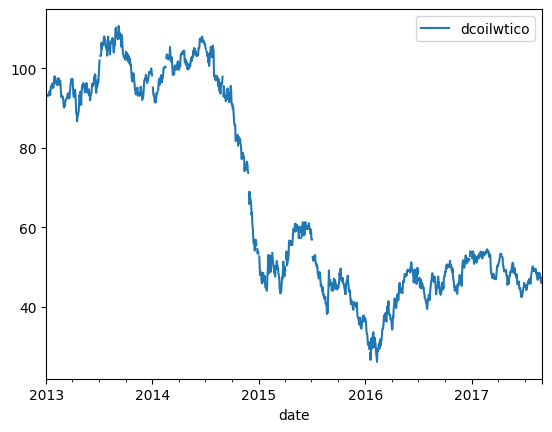

In [21]:
# original plot

oil.plot();

In [22]:
# mean of each type of missing value handling for time series

print(oil.ffill().mean(), 
      oil.bfill().mean(),
      oil.interpolate().mean()
     )

dcoilwtico    67.671249
dtype: float64 dcoilwtico    67.673325
dtype: float64 dcoilwtico    67.661824
dtype: float64


<Axes: xlabel='date'>

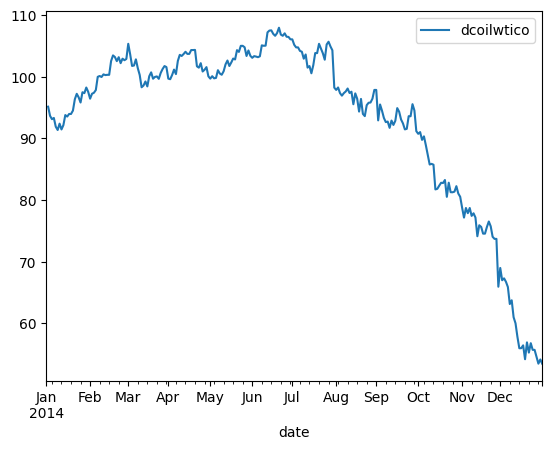

In [23]:
# Filter to 2014 then plot forward filled Series

oil.loc["2014"].ffill().plot()

<Axes: xlabel='date'>

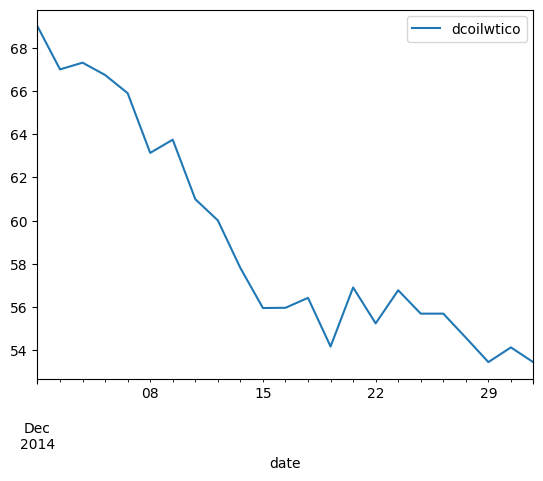

In [24]:
# Filter to December 2014 then plot forward filled Series

oil.loc["2014-12"].ffill().plot()

<Axes: xlabel='date'>

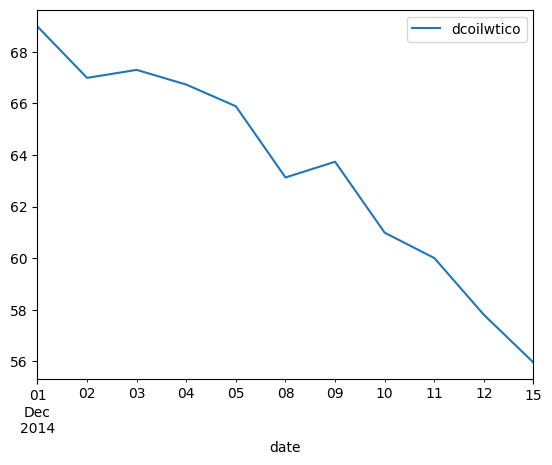

In [25]:
# Filter to first two weeks of December 2014 then plot forward filled Series

oil.loc["2014-12-01":"2014-12-15"].ffill().plot()

# Assignment 4: Shift and Diff

#### Monthly Lookback Chart (_Accounting_)

Hello,
I’m looking into a few different year over year trends related to changes made at store 47.

Can you plot the sum of monthly of transactions in year 2015 vs the sum of monthly transactions in the year prior for store 47?

Make sure to group your DataFrame by year AND month!

Thanks

In [41]:
transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

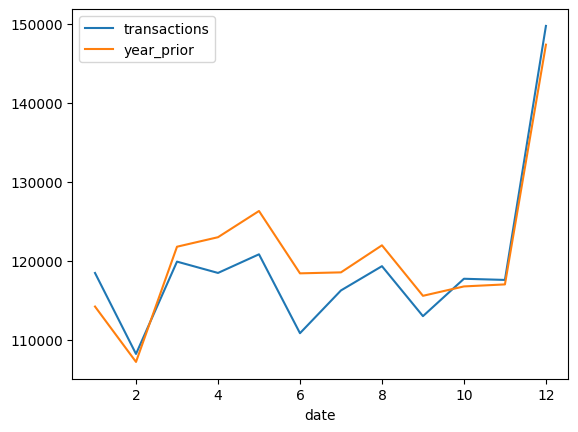

In [42]:
# filter df to store 47, 'drop' store_nbr column via loc
transactions_47 = transactions.loc[transactions["store_nbr"] == 47, ["date", "transactions"]]

# Calculate sum of sales by year and month
transactions_47 = (transactions_47
                   .groupby([transactions["date"].dt.year, transactions["date"].dt.month])
                   .agg({"transactions": "sum"}))

# Calculate a 'year_prior' column by shiftly monthly sales series forward by 12 rows (months)
transactions_47["year_prior"] = transactions_47["transactions"].shift(12)

# Filter to 2015 and plot
transactions_47.loc[2015].plot();

In [44]:
transactions_47.head(24)

transactions  year_prior
date date                          
2013 1           109668         NaN
     2           103706         NaN
     3           116873         NaN
     4           108571         NaN
     5           113532         NaN
     6           110637         NaN
     7           107506         NaN
     8           112001         NaN
     9           114468         NaN
     10          114585         NaN
     11          114436         NaN
     12          150204         NaN
2014 1           114190    109668.0
     2           107175    103706.0
     3           121771    116873.0
     4           122976    108571.0
     5           126298    113532.0
     6           118398    110637.0
     7           118522    107506.0
     8           121949    112001.0
     9           115552    114468.0
     10          116741    114585.0
     11          116996    114436.0
     12          147371    150204.0

In [45]:
transactions_47.loc[2015]

,transactions,year_prior
date,,
1,118445,114190.0
2,108186,107175.0
3,119883,121771.0
4,118449,122976.0
5,120810,126298.0
6,110814,118398.0
7,116234,118522.0
8,119307,121949.0
9,112975,115552.0


# Assignment 5: Resampling Time Series

#### Monthly and Annual Charts (_Sr. Financial Analyst_)

Plot the monthly and yearly average oil prices.

In [46]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [47]:
# Resampling on anual basis and calculating the average for each annual window

oil.resample("Y").mean()#.plot()

,dcoilwtico
date,
2013-12-31,97.982540
2014-12-31,93.172222
2015-12-31,48.656706
2016-12-31,43.293651
2017-12-31,49.232874


<Axes: xlabel='date'>

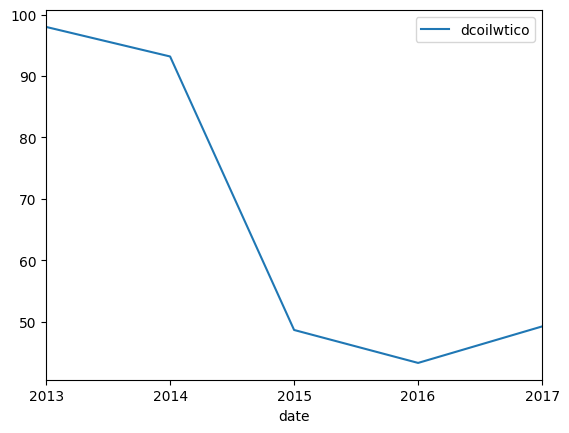

In [48]:
oil.resample("Y").mean().plot()

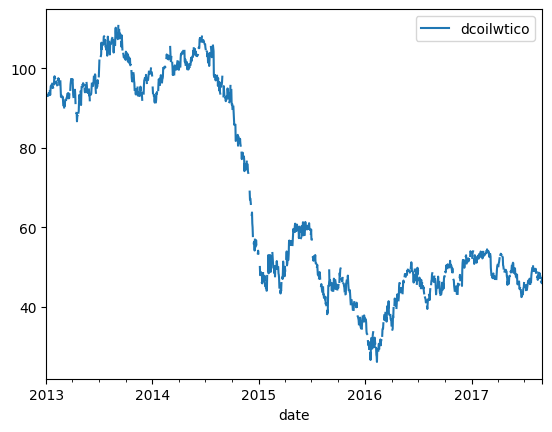

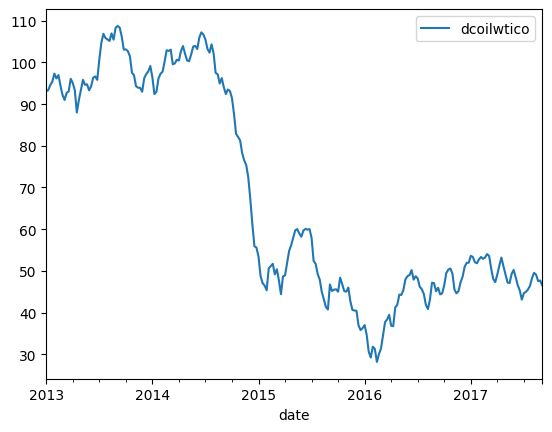

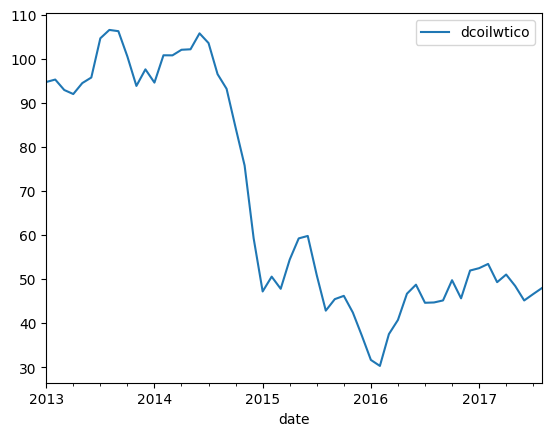

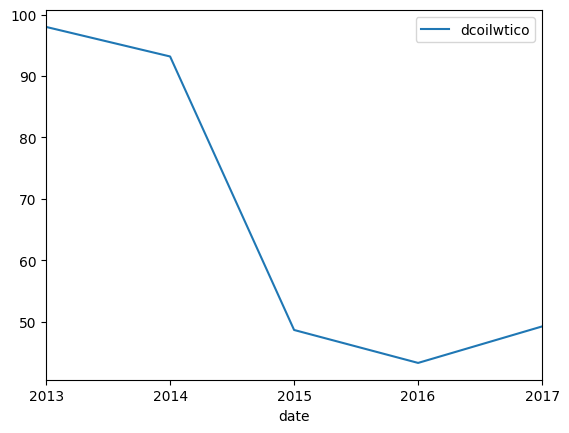

In [49]:
# A loop to create various time period averages and plot them
# Noted each of our series gets more smoothed out as we increase the size of the period

for period in ["D", "W", "M", "A"]:
    oil.resample(period).mean().plot()

# Assignment 6: Rolling Averages

#### Rolling Transactions (_Accounting_)

Plot the 90-day moving average for transactions for store 47.

This will help remove some of the noise from our series.

Thanks!


In [50]:
# recreate transactions_47 with date as index 

transactions_47 = (transactions
                   .loc[transactions["store_nbr"]==47, ["date", "transactions"]]
                   .set_index("date"))

transactions_47.head()

,transactions
date,
2013-01-02,4161
2013-01-03,3660
2013-01-04,3915
2013-01-05,4764
2013-01-06,4935


<Axes: xlabel='date'>

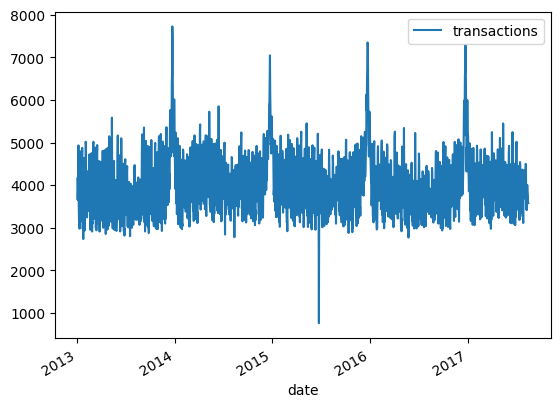

In [51]:
# original daily series for comparison

transactions_47.plot()

<Axes: xlabel='date'>

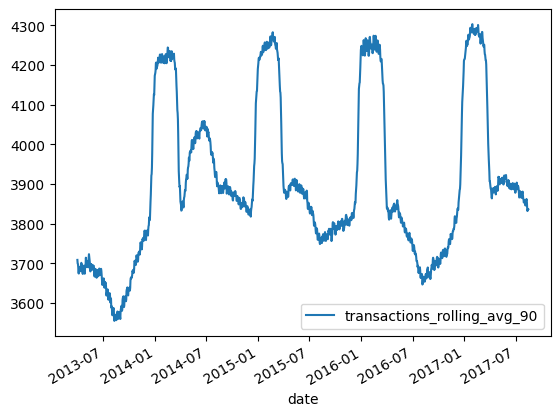

In [52]:
# Create 90 day rolling average column, drop original transactions column and plot.

(transactions_47
 .assign(transactions_rolling_avg_90 = transactions_47.rolling(90).mean())
 .drop(["transactions"], axis=1)
 .plot()
)

In [53]:
# our 90-day rolling average really helps us smooth out and understand general sales trends in our

(transactions_47
 .assign(transactions_rolling_avg_90 = transactions_47.rolling(90).mean())
 .drop(["transactions"], axis=1)
 #.plot()
)

,transactions_rolling_avg_90
date,
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-05,NaN
2013-01-06,NaN
...,...
2017-08-11,3838.744444
2017-08-12,3832.100000
2017-08-13,3835.388889
